In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data set
df=pd.read_csv('heart_disease_uci.csv')
len(df)

920

In [4]:
#this is what will happen if i drop null values the data decrease from 920 column to 299 column and that is too much
df_cleaned = df.dropna()
len(df_cleaned)

299

In [5]:
#explore first five items
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
#show columns names
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
#some information to discover the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
#number of null values in each column
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
#number of duplicated rows in the dataset
df.duplicated().sum()

0

In [10]:
#number of unique values in each column
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    if column in ['id','chol','thalch']:
        continue
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: age
Unique Values: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]

Column: sex
Unique Values: ['Male' 'Female']

Column: dataset
Unique Values: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']

Column: cp
Unique Values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Column: trestbps
Unique Values: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.   0.  96. 127.]

Column: fbs
Unique Values: [True False nan]

Column: restecg
Unique Values: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]

Column: exang
Unique Values: [False True nan]

Column: oldpeak
Unique Values: [ 2.3  1.5  2.6  3.5  1.4  0.8  3.6  0

In [12]:
#number unique values in specific column
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [13]:
#column trestbps has mean value =132 ,medain values=130,mode =120 and the values between 0 to 200 
#so 130 will be suitable to fill null values
print(df['trestbps'].mean())
print(df['trestbps'].median())
print(df['trestbps'].mode())
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)

132.13240418118468
130.0
0    120.0
Name: trestbps, dtype: float64


In [14]:
print(df['chol'].mean())
print(df['chol'].median())
print(df['chol'].mode())
df['chol'].fillna(df['chol'].median(), inplace=True)

199.13033707865168
223.0
0    0.0
Name: chol, dtype: float64


In [15]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mode()[0], inplace=True)

In [16]:
print(df['thalch'].mean())
print(df['thalch'].median())
print(df['thalch'].mode())
df['thalch'].fillna(df['thalch'].median(), inplace=True)

137.5456647398844
140.0
0    150.0
Name: thalch, dtype: float64


In [17]:
print(df['oldpeak'].mean())
print(df['oldpeak'].median())
print(df['oldpeak'].mode())
df['thalch'].fillna(df['thalch'].median(), inplace=True)

0.8195652173913044
0.2
0    0.0
Name: oldpeak, dtype: float64


In [18]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [19]:
#number of null values in each column
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [20]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.819565,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.076582,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.200000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [21]:
df.describe(exclude=['int','float'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,920,920,920,920,920
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,782,553,583,654,682


In [22]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print(numerical_columns)
numerical_columns=[col  for col in numerical_columns  if col !='id']
numerical_columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

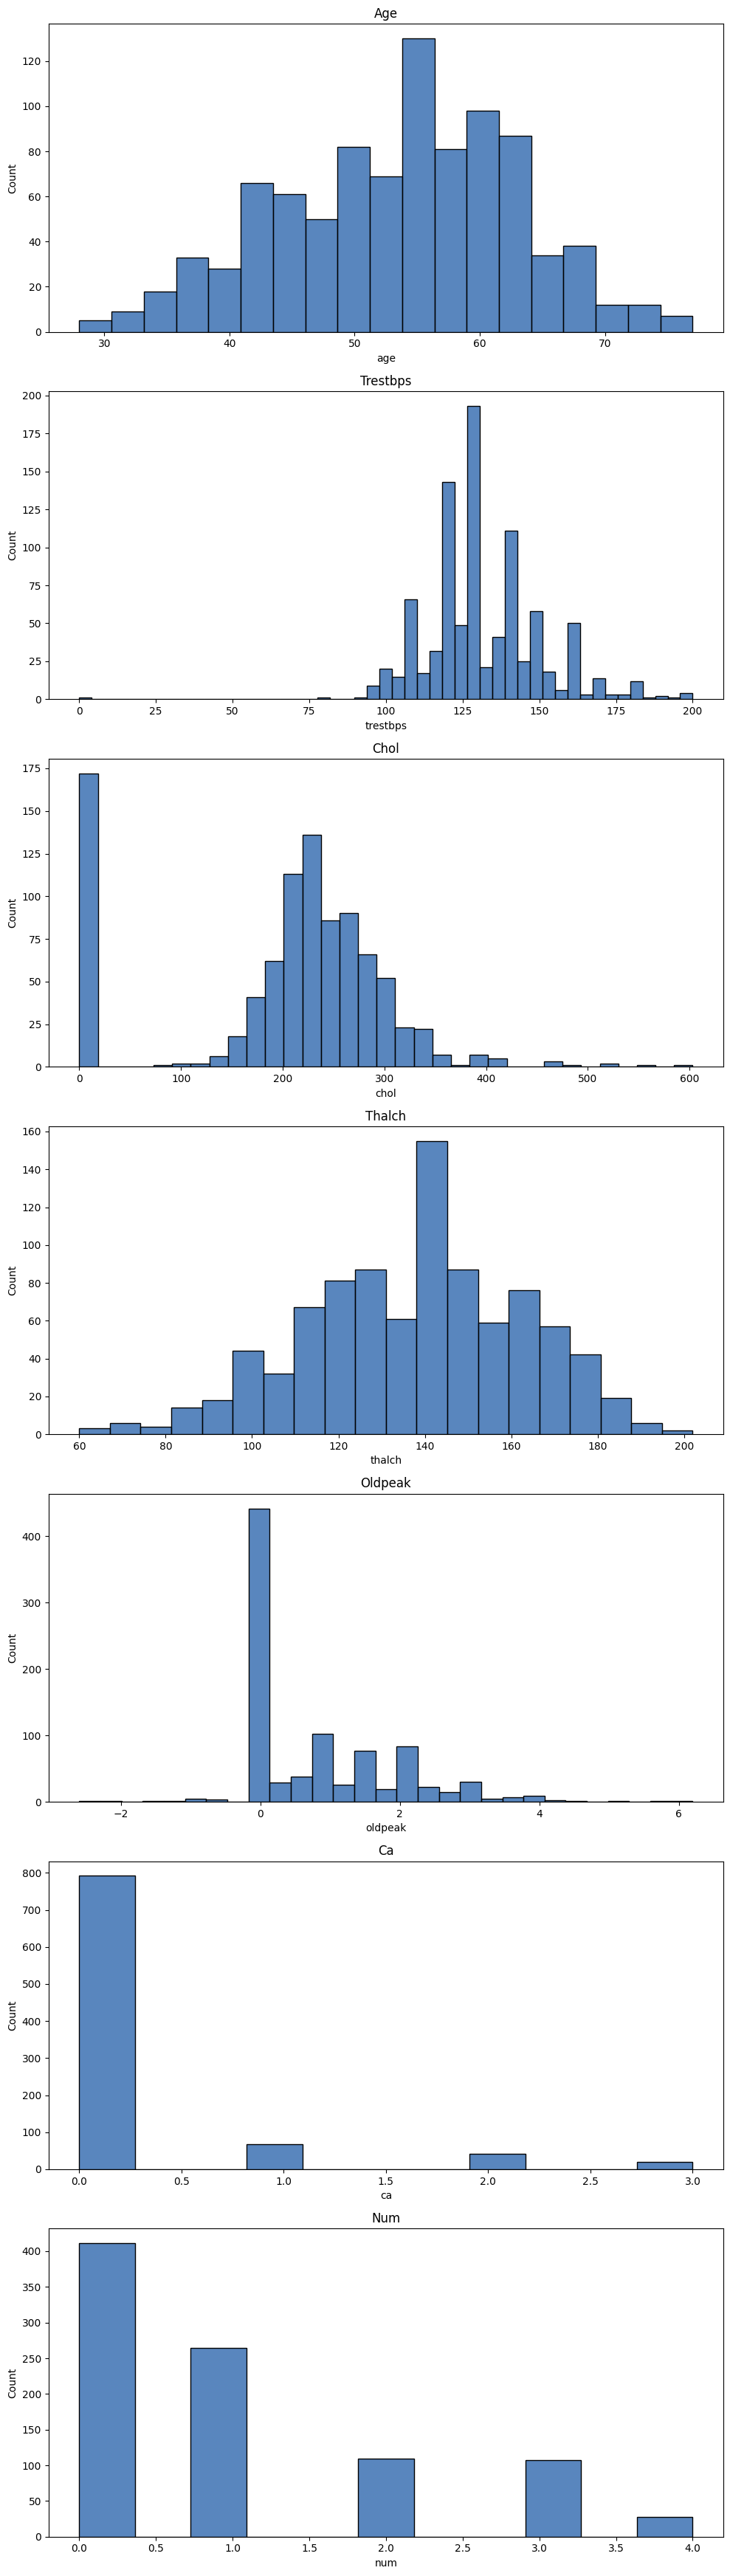

In [91]:



# Create subplots with a reasonable figure size based on the number of columns
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(10, len(numerical_columns) * 5))

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(x=column, data=df, ax=ax[i], color='#225ea8')
    ax[i].set_title(column.capitalize())

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [85]:
categorical_columns = df.select_dtypes(include=['int', 'float']).columns
print(categorical_columns)

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.5+ KB


<h3>Analysis of single feature<h3>

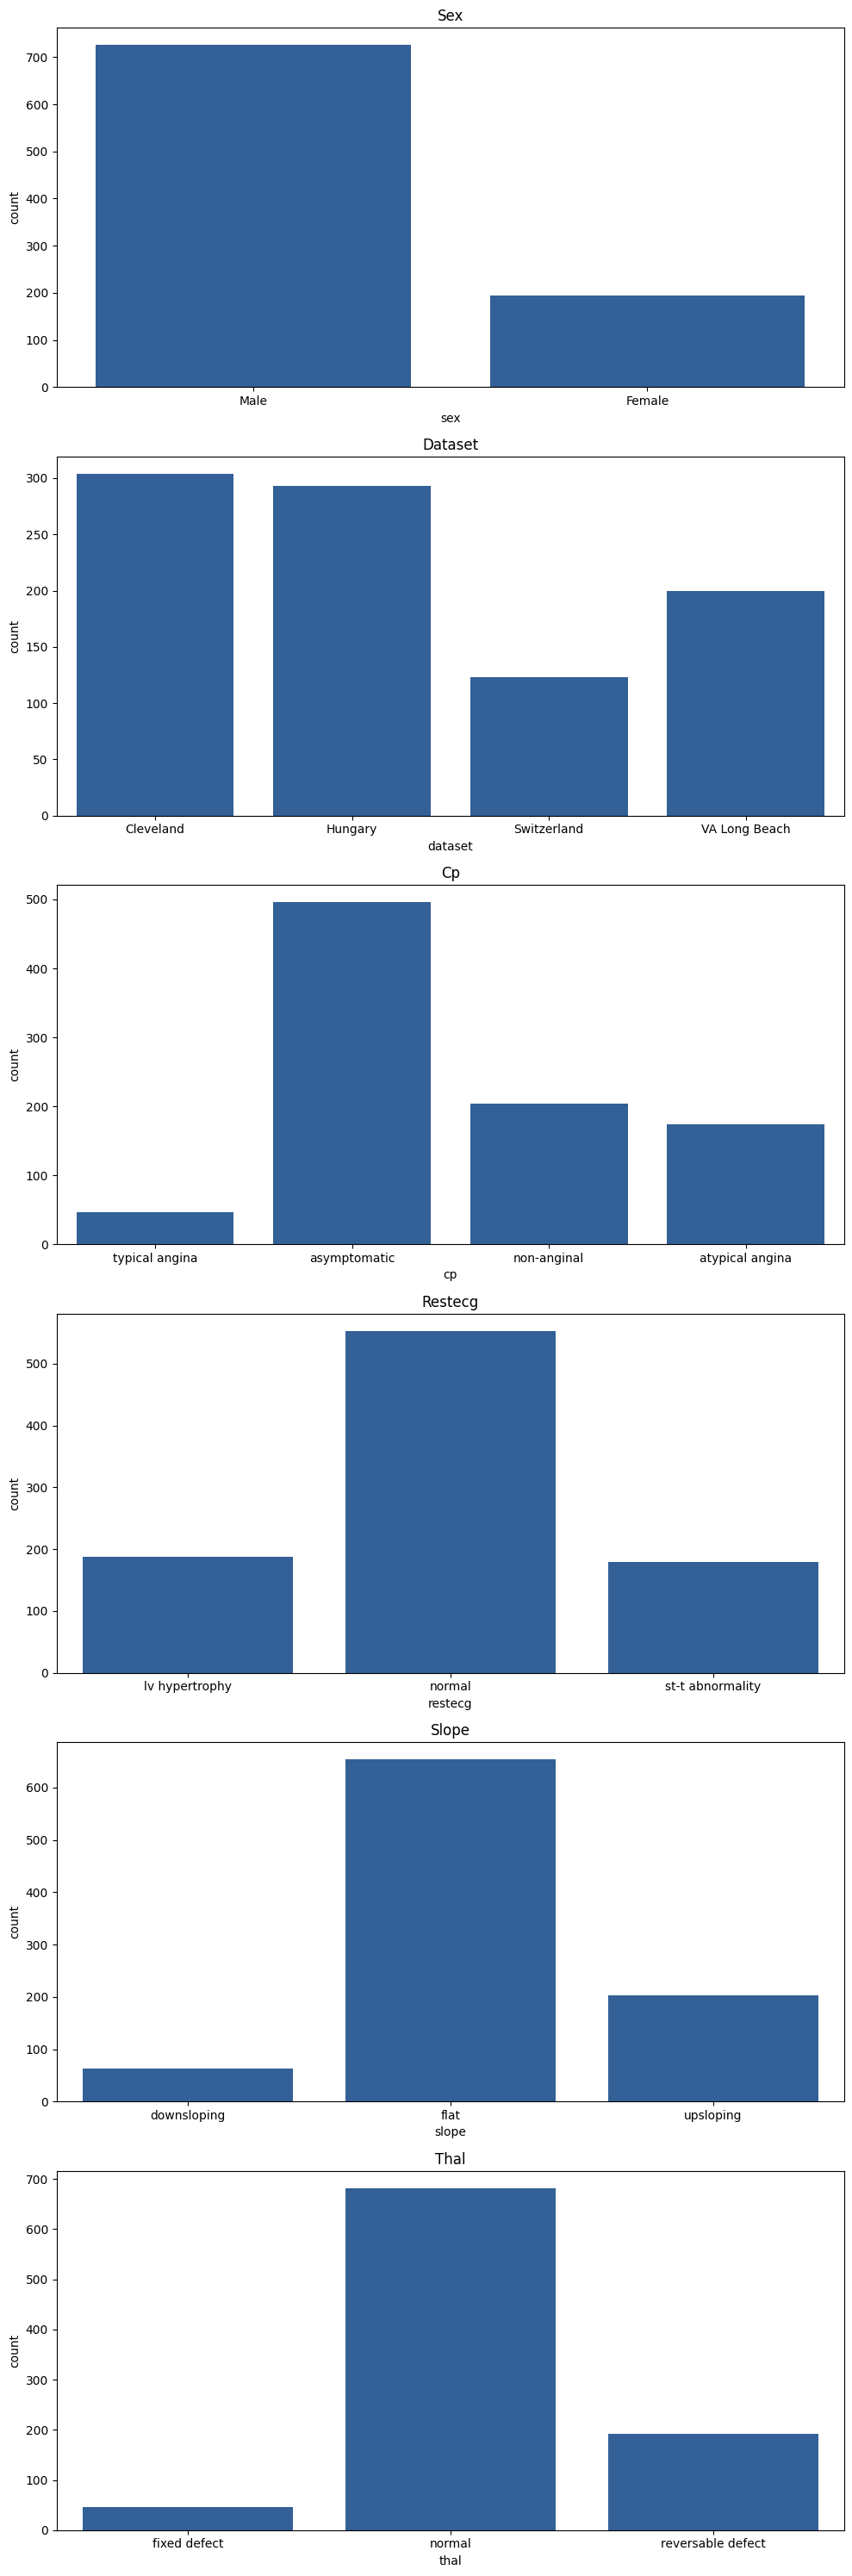

In [95]:

# Create subplots with a reasonable figure size based on the number of columns
fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 5))

# Plot countplots for each numerical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=ax[i], color='#225ea8')
    ax[i].set_title(column.capitalize())

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


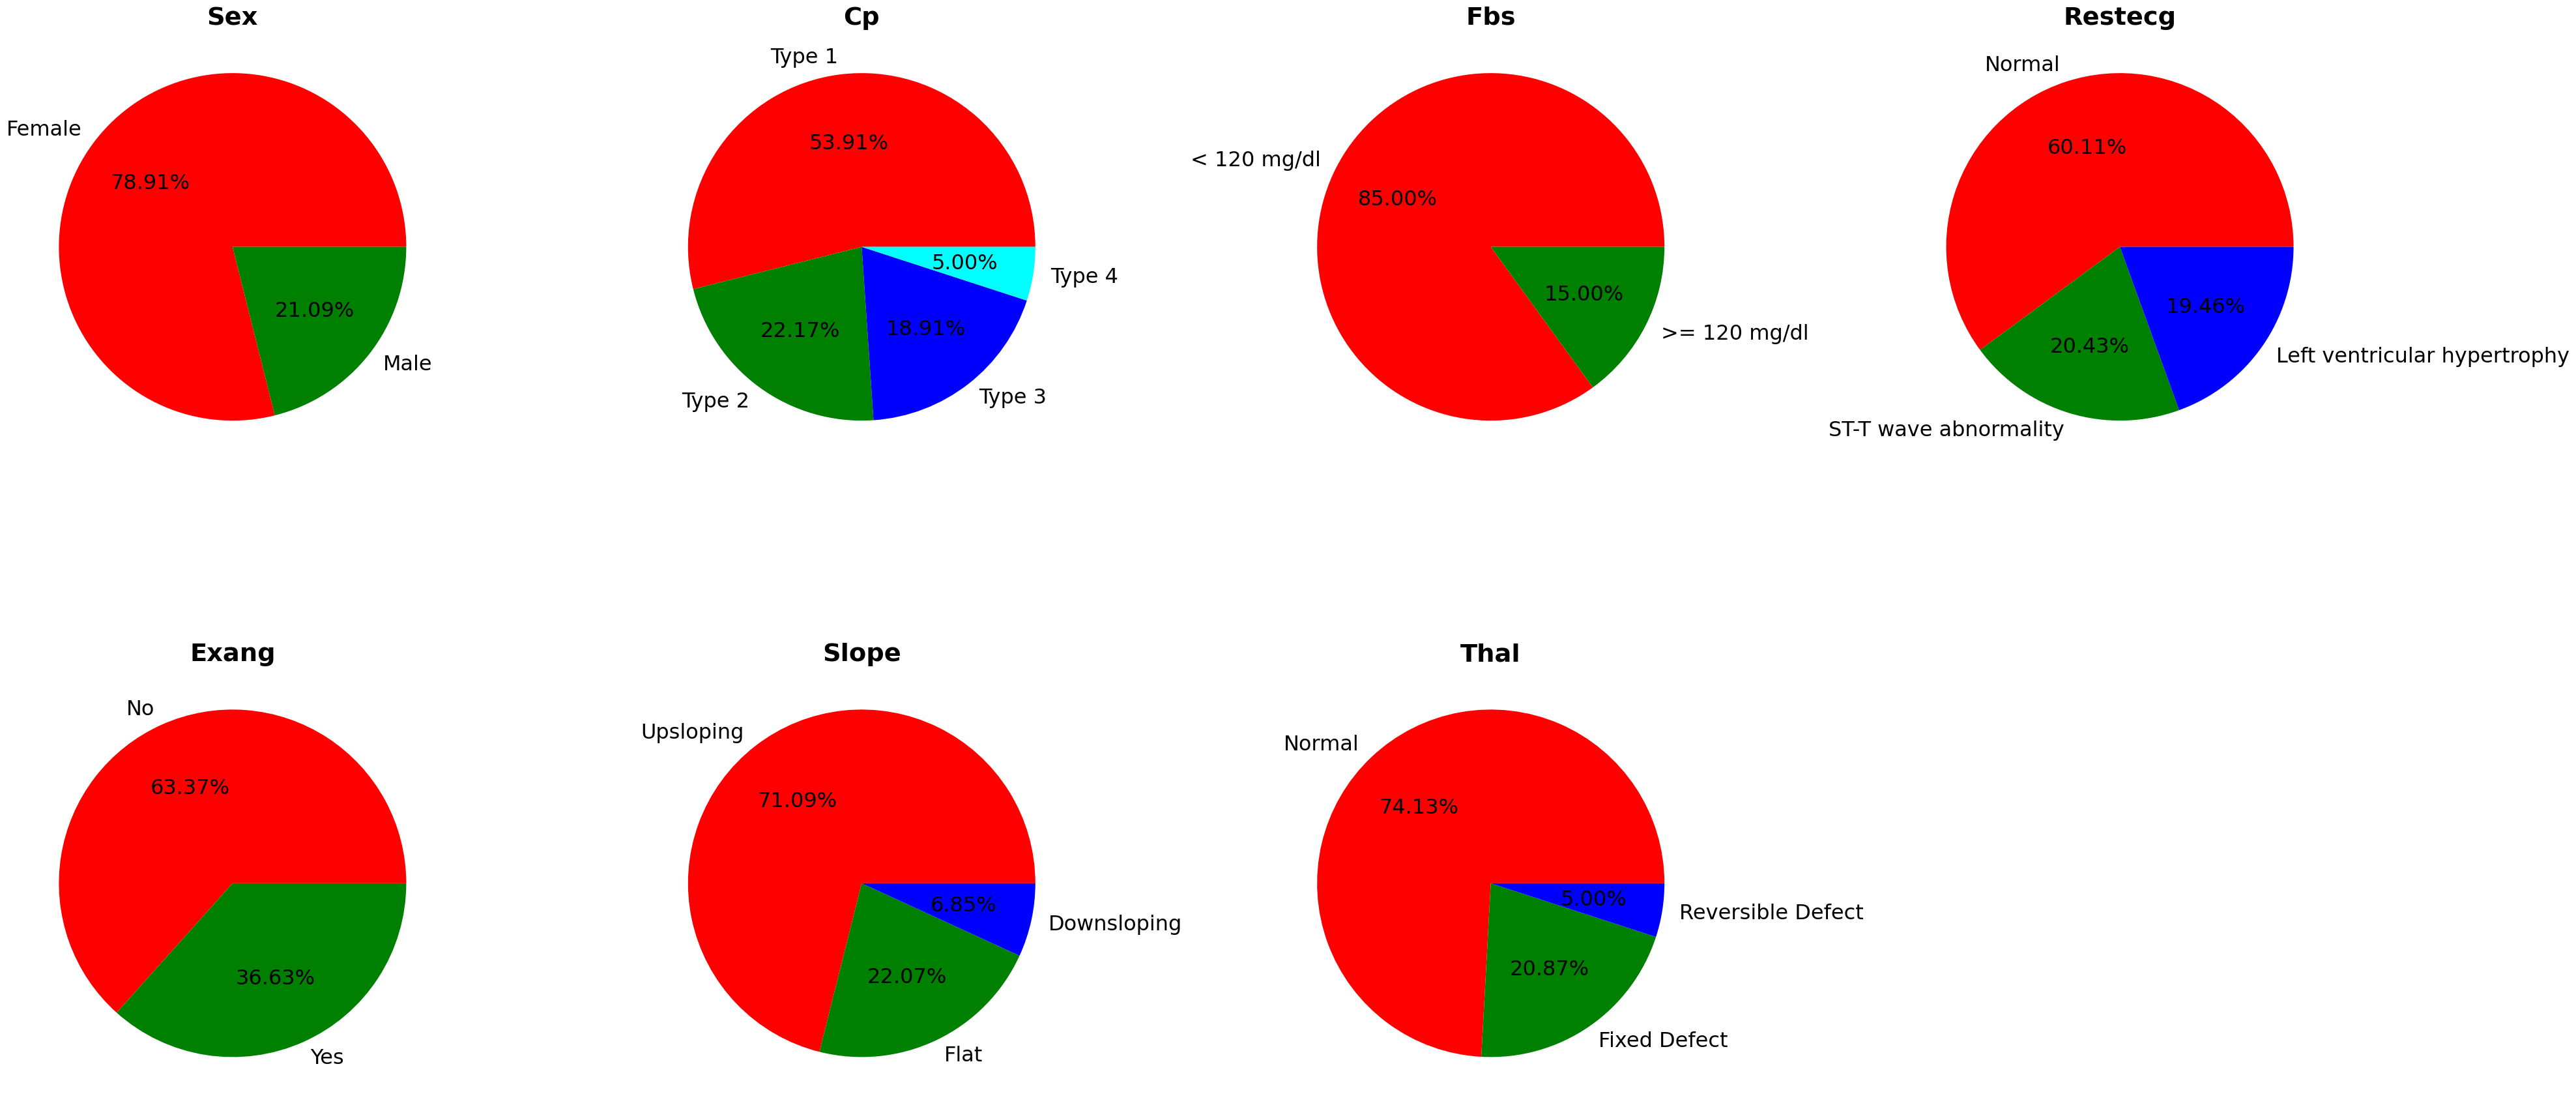

In [96]:
import matplotlib.pyplot as plt

# Define the list of categorical columns in the UCI Heart Disease dataset
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Define the colors for the pie charts (adjust as needed based on unique values)
colors = {
    'sex': ['red', 'green'],
    'cp': ['red', 'green', 'blue', 'cyan'],
    'fbs': ['red', 'green'],
    'restecg': ['red', 'green', 'blue'],
    'exang': ['red', 'green'],
    'slope': ['red', 'green', 'blue'],
    'thal': ['red', 'green', 'blue']
}

# Define the labels for each categorical column
labels_dict = {
    'sex': ['Female', 'Male'],
    'cp': ['Type 1', 'Type 2', 'Type 3', 'Type 4'],  # Replace with actual labels if known
    'fbs': ['< 120 mg/dl', '>= 120 mg/dl'],
    'restecg': ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'],
    'exang': ['No', 'Yes'],
    'slope': ['Upsloping', 'Flat', 'Downsloping'],
    'thal': ['Normal', 'Fixed Defect', 'Reversible Defect']
}

# Set the figure size and font size
plt.rcParams['figure.figsize'] = (40, 20)
plt.rcParams['font.size'] = 23

# Loop through each categorical column and create a pie chart
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 4, i + 1)  # Create a subplot grid based on the number of columns
    size = df[column].value_counts()  # Get the counts for each category
    plt.pie(size, colors=colors[column], labels=labels_dict[column], autopct='%.2f%%')
    plt.title(column.replace('_', ' ').title(), fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<h2>Relation between two features<h2>

C:\Users\Ziad\AppData\Local\Temp\ipykernel_11072\1749643264.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=15)  # Rotate x labels and reduce font size
C:\Users\Ziad\AppData\Local\Temp\ipykernel_11072\1749643264.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=15)  # Rotate x labels and reduce font size
C:\Users\Ziad\AppData\Local\Temp\ipykernel_11072\1749643264.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=15)  # Rotate x labels and reduce font size


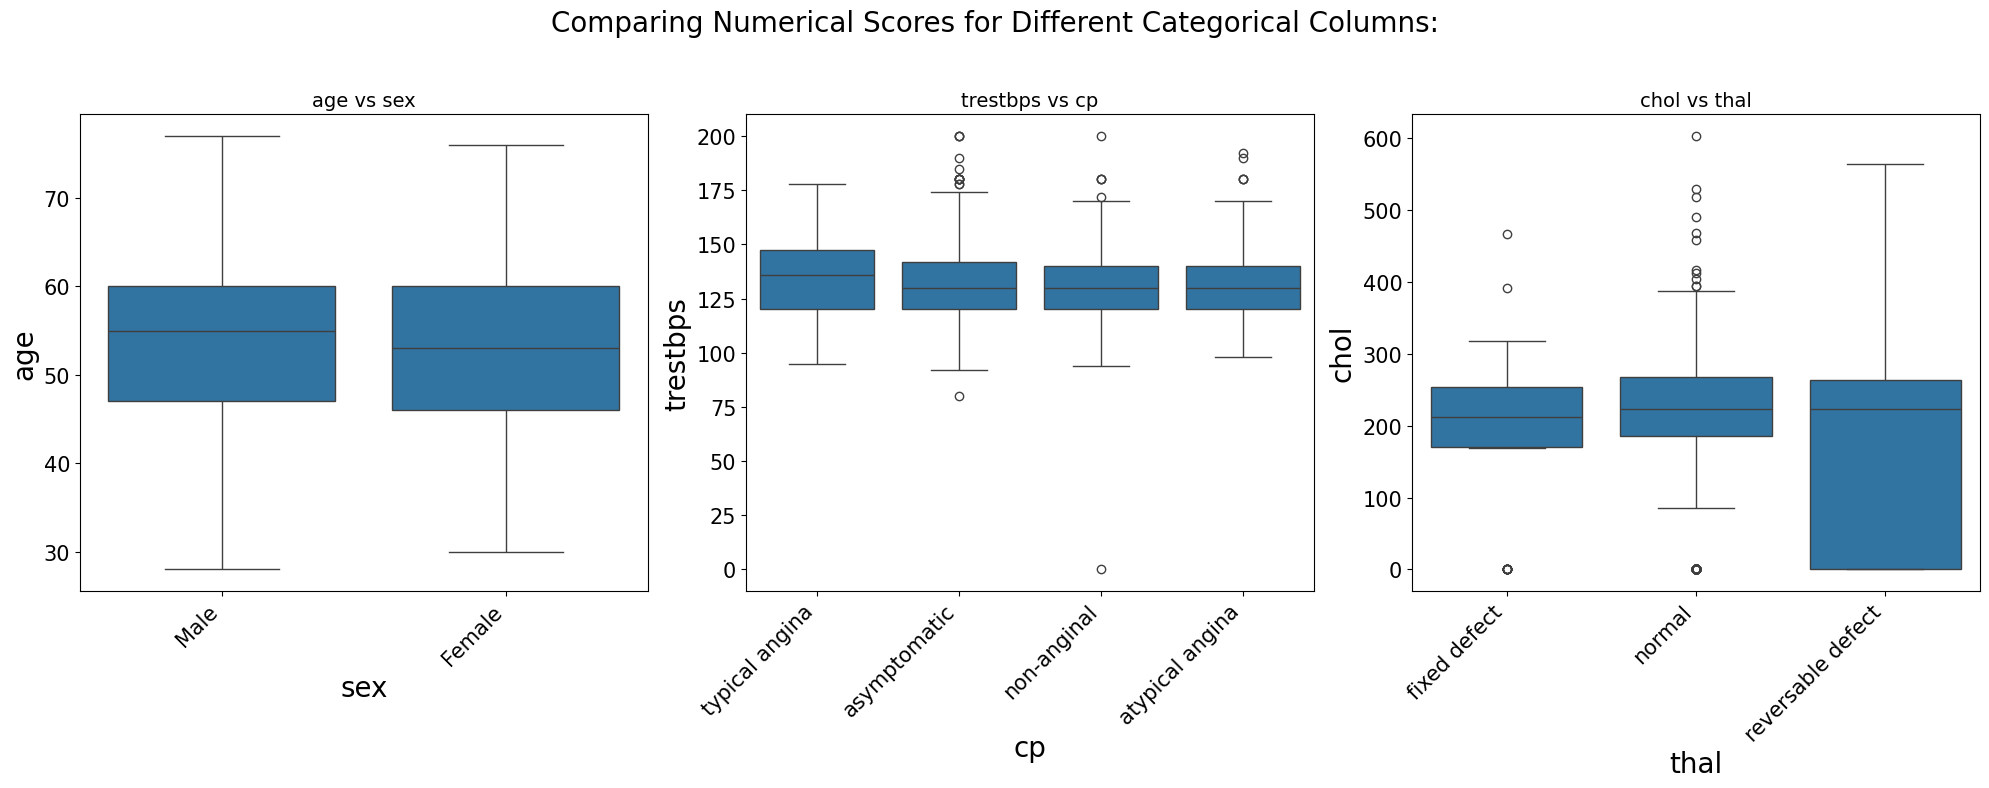

In [26]:

# Define the list of categorical columns and numerical columns
categorical_columns = ['sex', 'cp', 'thal']
numerical_columns = ['age', 'trestbps', 'chol']  # Example numerical columns

# Create subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 8))
fig.suptitle('Comparing Numerical Scores for Different Categorical Columns:', fontsize=20)

# Loop through each categorical column and create a boxplot
for i, (cat_col, num_col) in enumerate(zip(categorical_columns, numerical_columns)):
    sns.boxplot(x=cat_col, y=num_col, data=df, ax=axes[i])
    axes[i].title.set_text(f'{num_col} vs {cat_col}')
    axes[i].title.set_fontsize(14)  # Set title font size
    axes[i].xaxis.label.set_size(20)  # Set x-axis label font size
    axes[i].yaxis.label.set_size(20)  # Set y-axis label font size
    axes[i].tick_params(axis='both', labelsize=15)  # Set font size for tick labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=15)  # Rotate x labels and reduce font size

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()


In [ ]:
"""
from the previous graph we found that male and female in the data aged between 45 to 60

In the cp feature all of it is values corresponding to value between 120 to 145 in feature trestbps

in thrid graph we found that people whose thal feature is normal or fixed defect their values 
in chol feature between 180 to 250 but whose thal feature is reversable defect their chol start from 0
to 250
 
"""

<Axes: xlabel='num', ylabel='count'>

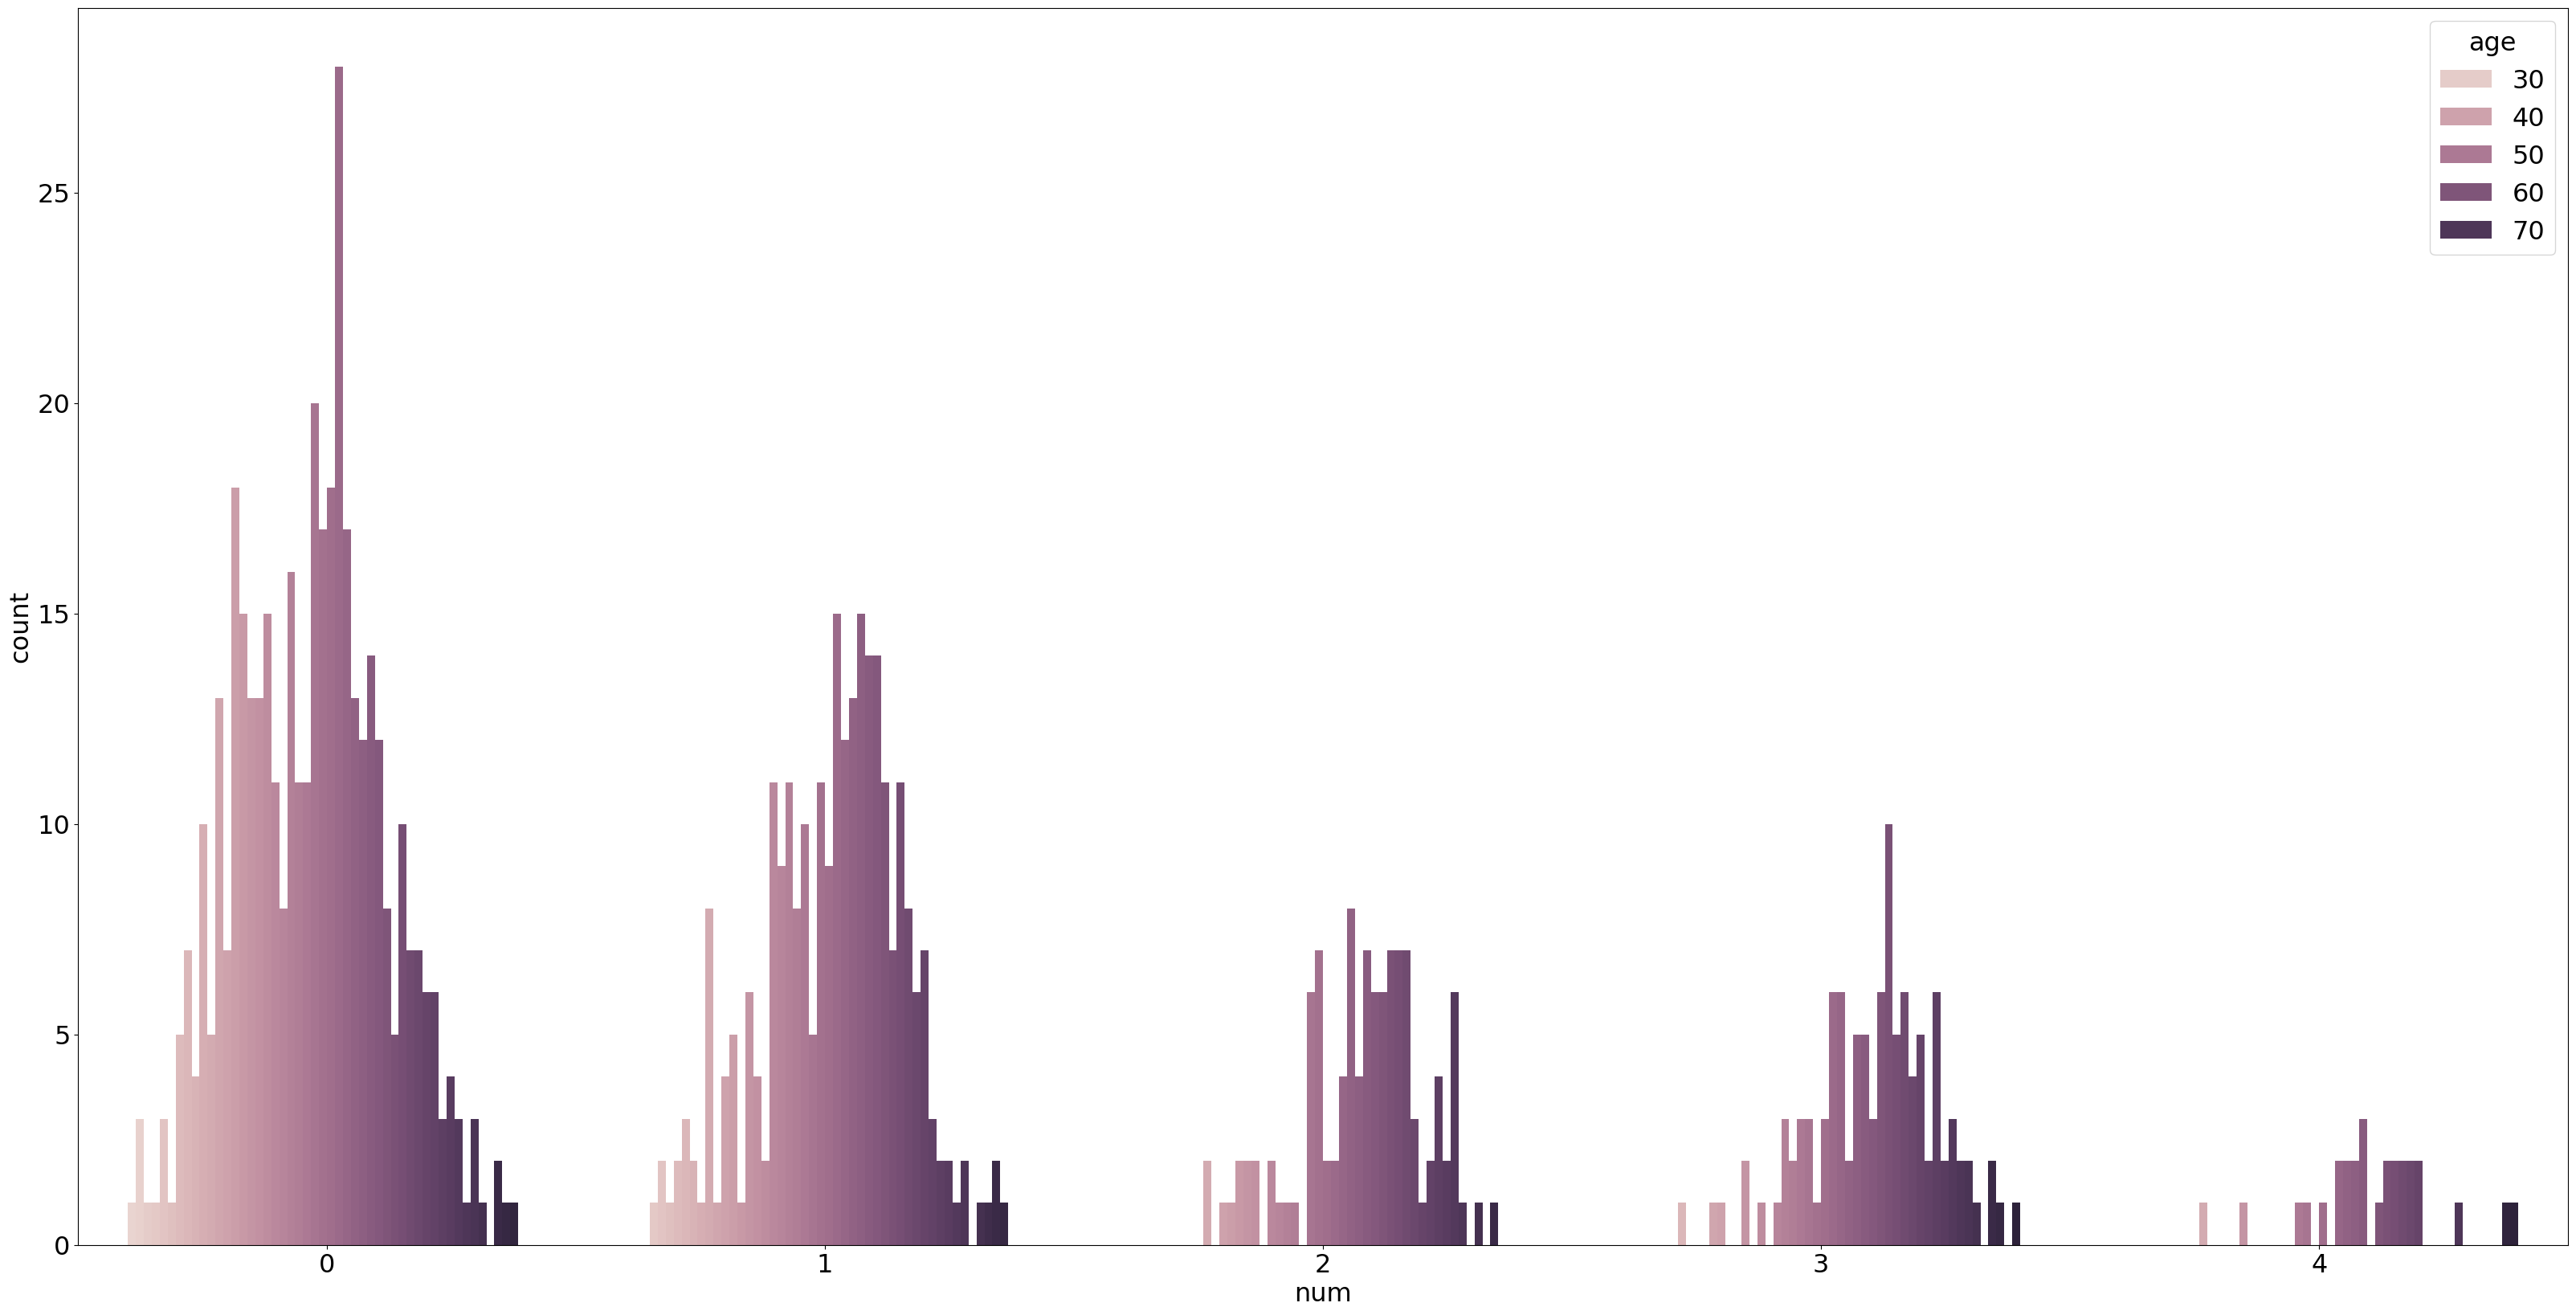

In [145]:
sns.countplot(x='num', hue='age', data=df)

In [ ]:
'''
from the previous graph we found that the biggest group who has not a Heart Disease and in this group 
people with age less than 40 has good healthy 
in group 0 and 1 number of people whose ages less than 40 are alot but in other groups number of thoes people
are less and total number in these groups are less


'''

<Axes: xlabel='sex', ylabel='Count'>

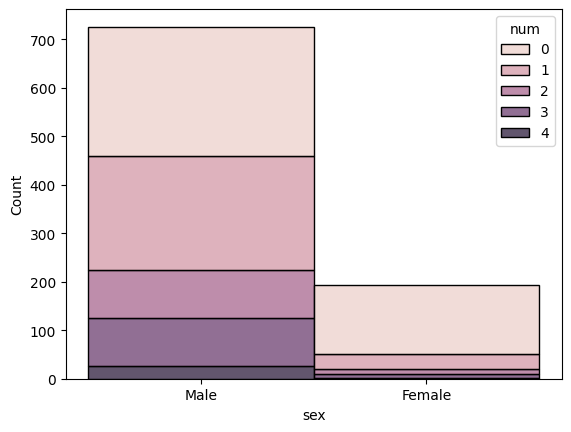

In [32]:
sns.histplot(df, x='sex', hue='num', stat='count', binwidth=1, multiple='stack')


In [ ]:
'''in the previous graph as the number of males is greater than number of females so
number of men with heart deasies is greater than the number of female '''

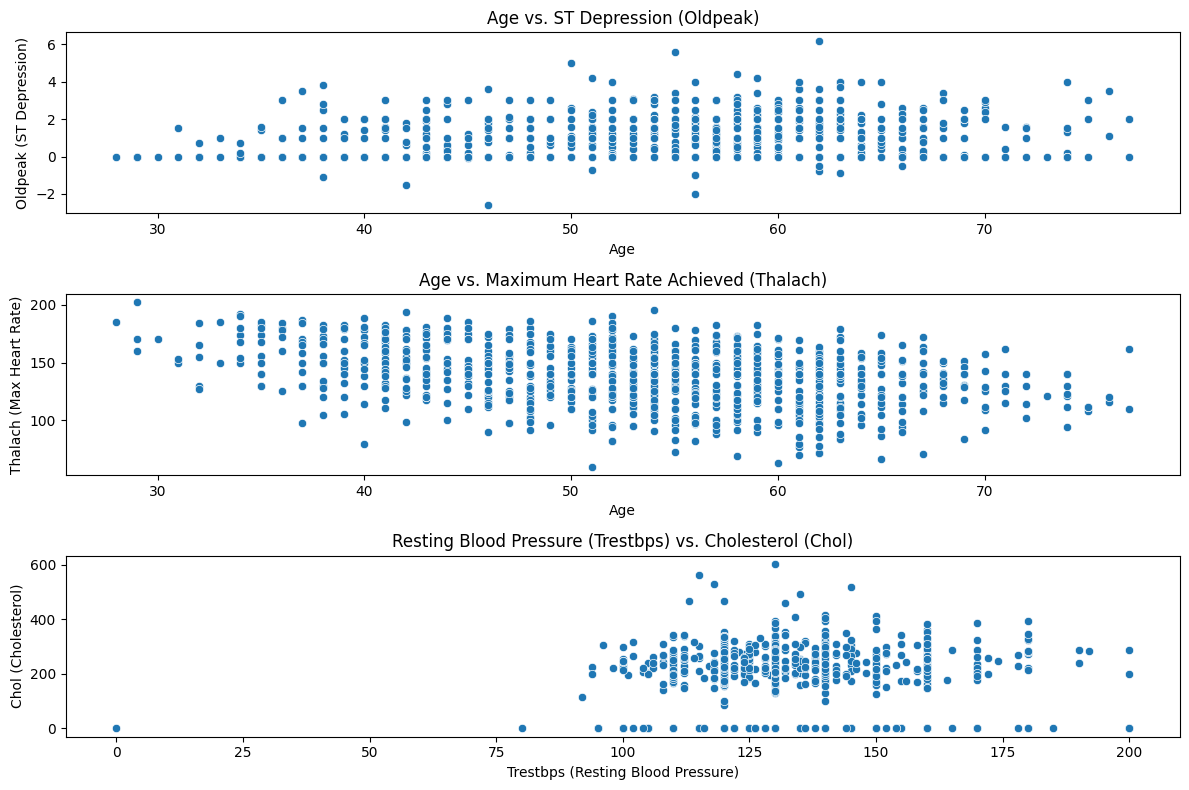

In [24]:
# Plot Age vs. Oldpeak
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first plot
sns.scatterplot(x='age', y='oldpeak', data=df)
plt.title('Age vs. ST Depression (Oldpeak)')
plt.xlabel('Age')
plt.ylabel('Oldpeak (ST Depression)')

# Plot Thalach vs. Age
plt.subplot(3, 1, 2)  # 3 rows, 1 column, second plot
sns.scatterplot(x='age', y='thalch', data=df)
plt.title('Age vs. Maximum Heart Rate Achieved (Thalach)')
plt.xlabel('Age')
plt.ylabel('Thalach (Max Heart Rate)')

# Plot Trestbps vs. Chol
plt.subplot(3, 1, 3)  # 3 rows, 1 column, third plot
sns.scatterplot(x='trestbps', y='chol', data=df)
plt.title('Resting Blood Pressure (Trestbps) vs. Cholesterol (Chol)')
plt.xlabel('Trestbps (Resting Blood Pressure)')
plt.ylabel('Chol (Cholesterol)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
'''
in the previous graph we found that:
first plot:old peak most of values from 40 to 70 and most of the values above the zero too

second plot:the Max heart rate is regular from 25 to 70 years old 

third plot: the resting blood pressure is between 120 to 180 and that normal ,
about the echolesterol most of the values between 150 to 400
'''

<h3>All the features togather<h3>

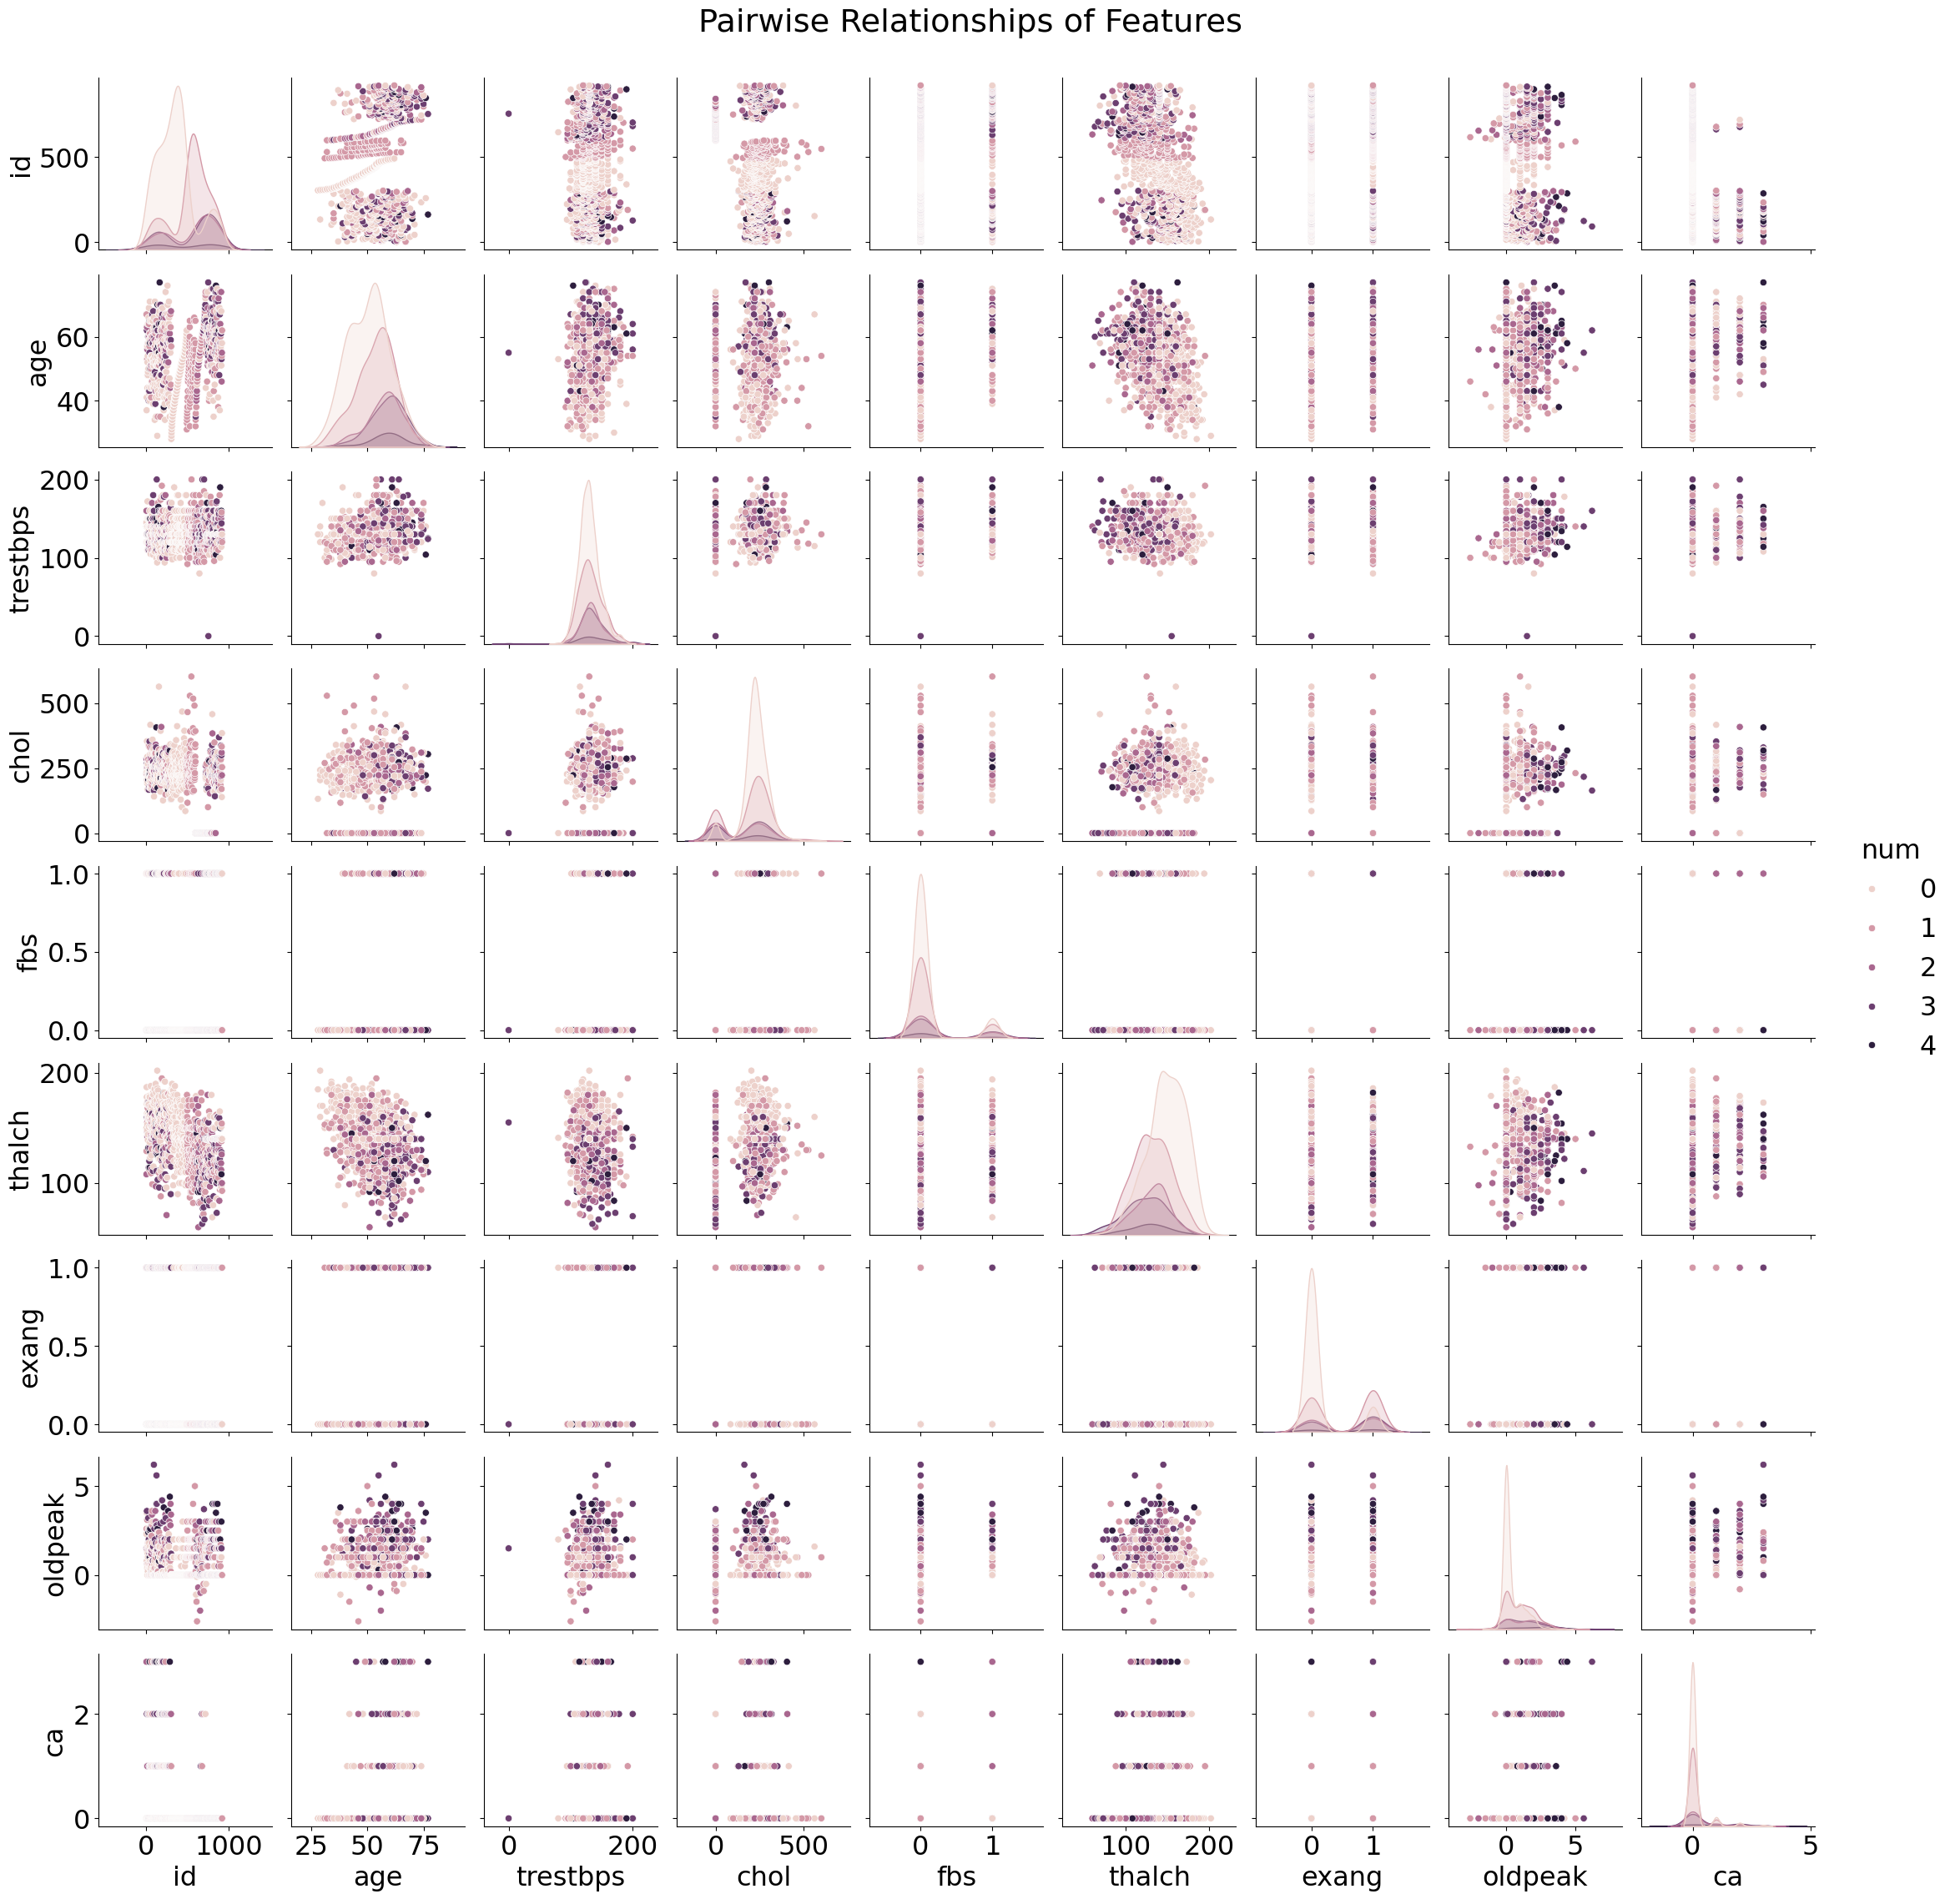

In [117]:
sns.pairplot(df, hue='num', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Features', y=1.02)
plt.show()

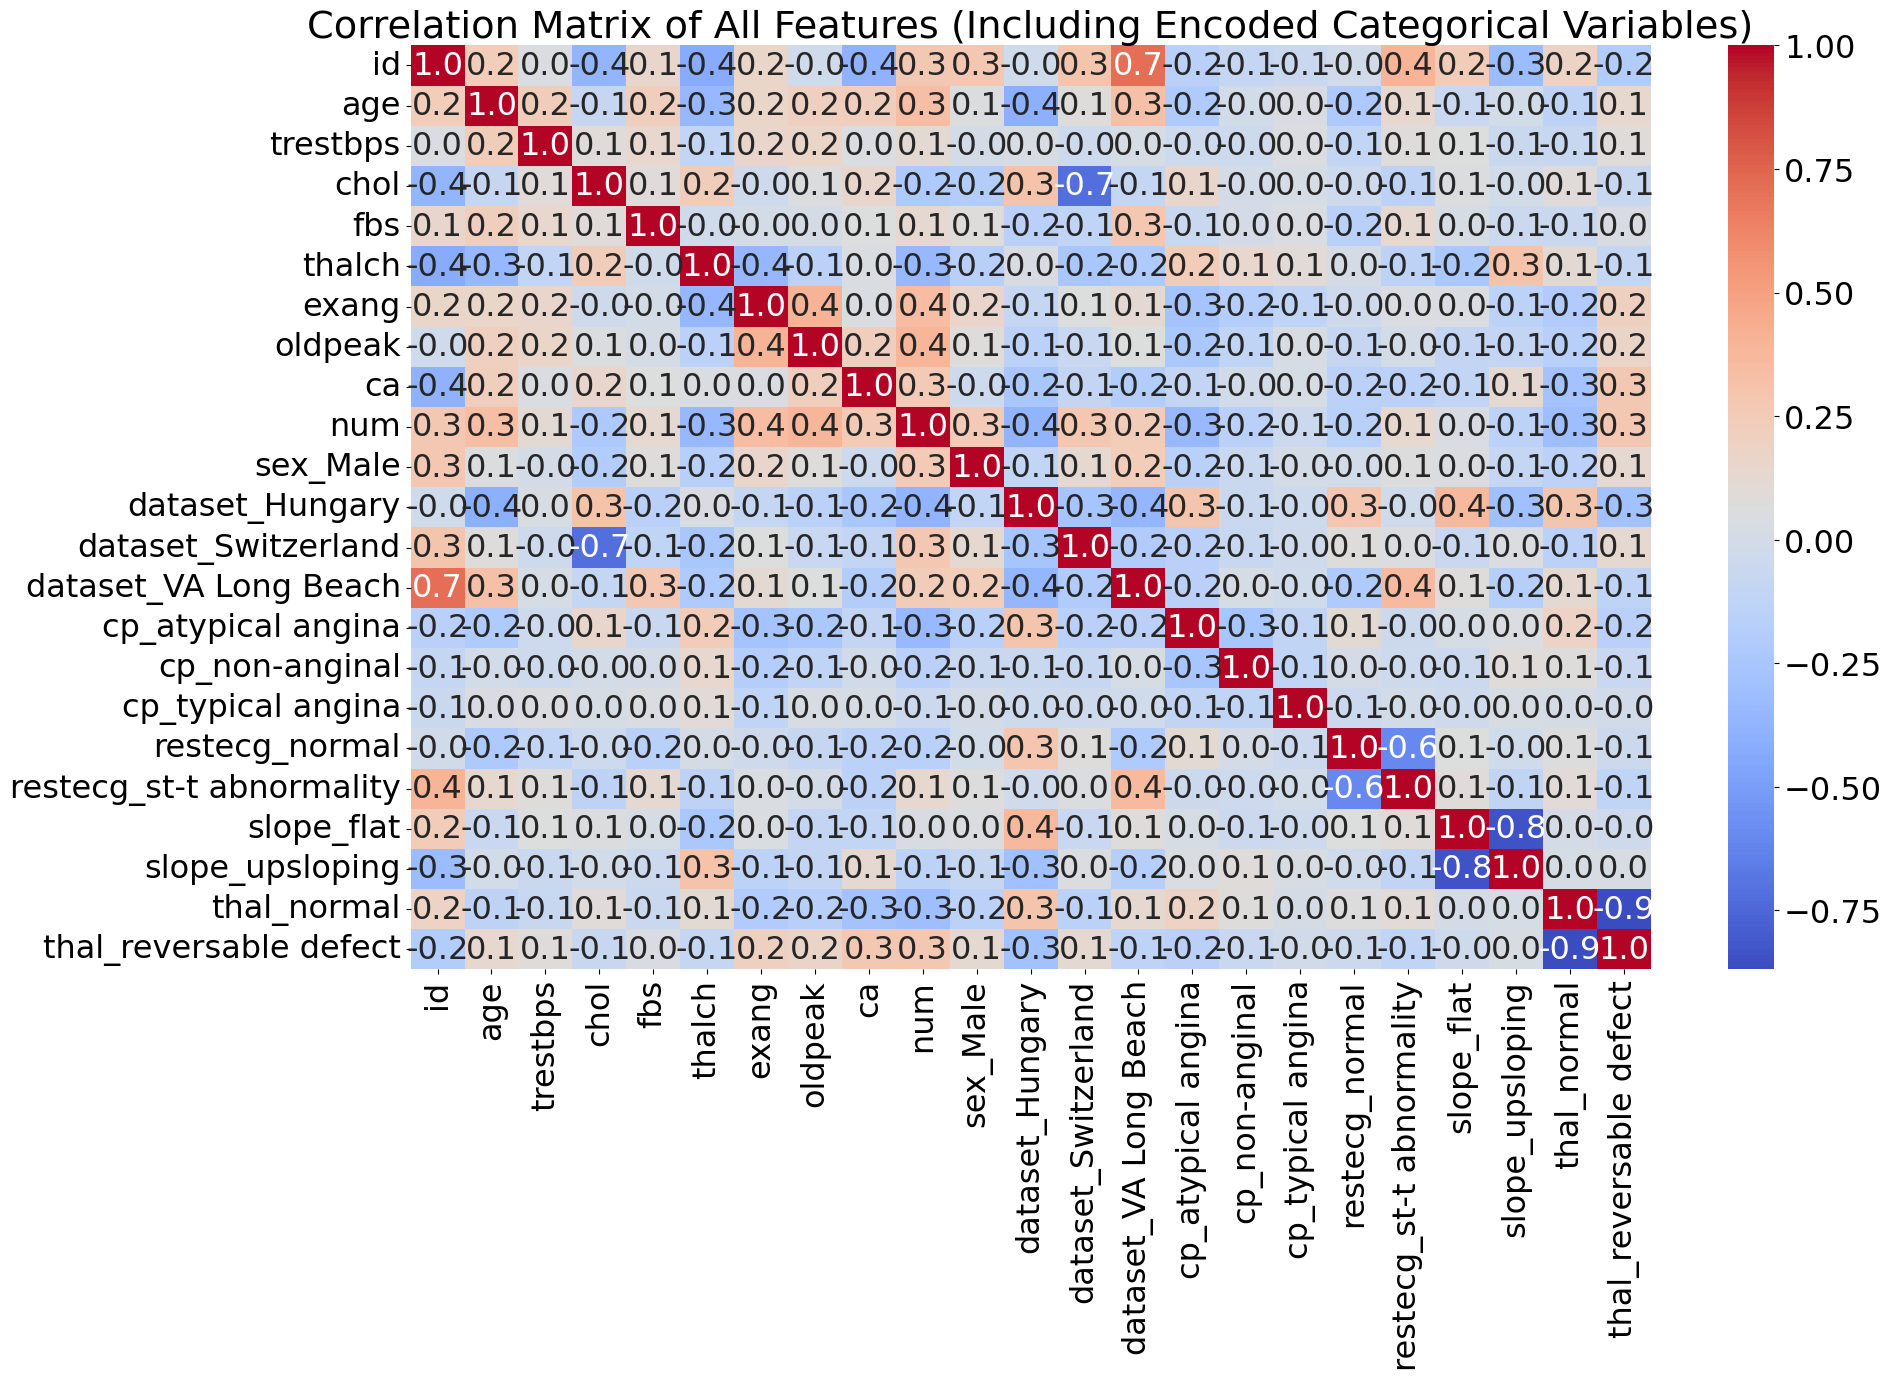

In [131]:
encoded_df = pd.get_dummies(df, drop_first=True)

# Create a heatmap of the correlation matrix for all features
plt.figure(figsize=(20, 12))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of All Features (Including Encoded Categorical Variables)')
plt.show()